# Vibration modes of a membrane in parabolic coordinates

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy.linalg import eigh
from sympy import (symbols, lambdify, init_printing, cos, sin, 
                   pi, expand, Matrix, diff, integrate, Poly)
from sympy.plotting import plot3d
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path

In [3]:
x, y, r, s= symbols('x y r s')
init_printing()

## Boundary conditions

The boundary conditions are satisfied multiplying by $b(x, y)$.

In [4]:
b = lambda x, y: (2*y - x**2 + 1)*(2*y - 1 + x**2)
bound = b(x, y)

In [5]:
b_num = lambdify((x,y), bound, "numpy")
X, Y = np.mgrid[-1:1:200j, -0.5:0.5:200j]
bound_num = b_num(X,Y)

<IPython.core.display.Javascript object>


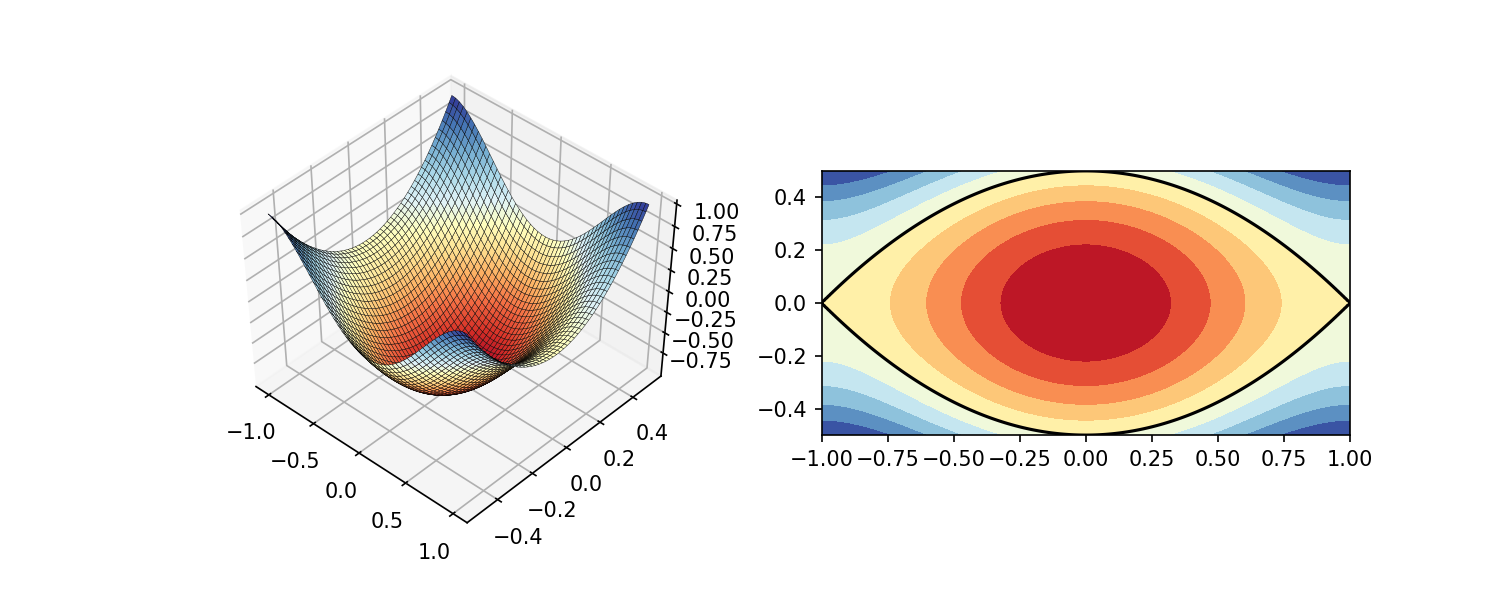

In [6]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, bound_num, cmap="RdYlBu", lw=0.2, edgecolor="black",
                vmin=-1, vmax=1)
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, bound_num, 12, cmap="RdYlBu", vmin=-1, vmax=1)
ax2.contour(X, Y, bound_num, [0], colors="black")
ax2.axis("image");

## Approximating functions

In [7]:
def w_fun(x, y, m, n):
    """ Trial function. """
    c = symbols('c:%d' % (m*n)) # This is the way of define the coefficients c_i
    w = []
    for i in range(0, m):
        for j in range(0, n):
            w.append(x**i * y**j)
    
    return w, c

def u_fun(x, y, m, n):
    """ Complete function. Contains the boundary and trial functions. """
    w, c = w_fun(x, y, m, n)
    return [b(x, y) * phi for phi in w ], c

m = 10
n = 10
u, c = u_fun(x, y, m, n)

## Matrices and solution

In [8]:
dudx = [diff(u[k], x) for k in range(len(c))]
dudy = [diff(u[k], y) for k in range(len(c))]

In [9]:
Kaux = Matrix(m*n, m*n, lambda ii, jj: dudx[ii]*dudx[jj] + dudy[ii]*dudy[jj])
Maux = Matrix(m*n, m*n, lambda ii, jj: u[ii]*u[jj])
K = Matrix(m*n, m*n, lambda i,j: 0)
M = Matrix(m*n, m*n, lambda i,j: 0)

The integrals should be of the form

$$B_{ij} = \int\limits_{-1}^1\int\limits_{\frac{1}{2}(x^2 - 1)}^{\frac{1}{2}(1 - x^2)}
  A_{ij} \mathrm{d}y\, \mathrm{d}x\, ,$$

In [10]:
for row in range(m*n):
    for col in range(row, m*n):
        K_inte = Kaux[row, col]
        M_inte = Maux[row, col]
        K_inte = integrate(K_inte, (y, (x**2 - 1)/2, (1 - x**2)/2), (x, -1, 1))
        M_inte = integrate(M_inte, (y, (x**2 - 1)/2, (1 - x**2)/2), (x, -1, 1))
        K[row, col] += K_inte
        M[row, col] += M_inte
        if row != col:
            K[col, row] += K_inte
            M[col, row] += M_inte

In [11]:
Kn = np.array(K).astype(np.float64)
Mn = np.array(M).astype(np.float64)

<IPython.core.display.Javascript object>


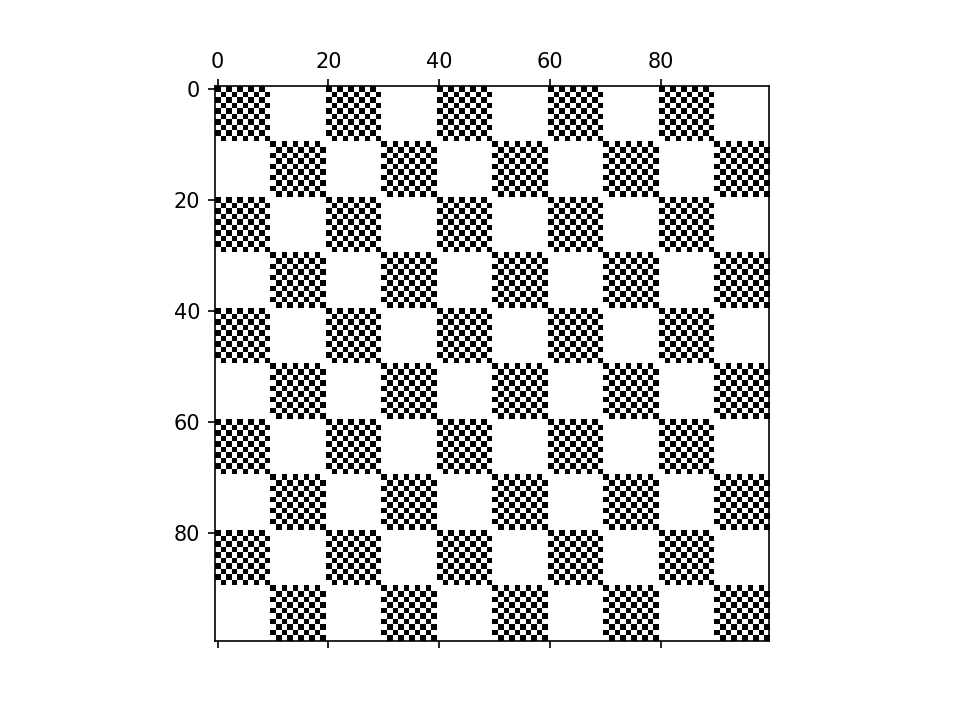

In [21]:
plt.figure()
plt.spy(Kn)

In [22]:
vals, vecs = eigh(Kn, Mn, eigvals=(0,9))
vals

array([ 16.10095349,  30.93334613,  50.33837559,  50.33838703,
        74.38718679,  74.38735248, 102.698126  , 102.75135697,
       105.00010187, 135.35510848])

## Visualization of the modes

In [23]:
mask = np.zeros_like(X)
mask[bound_num < 0] = 1

<IPython.core.display.Javascript object>


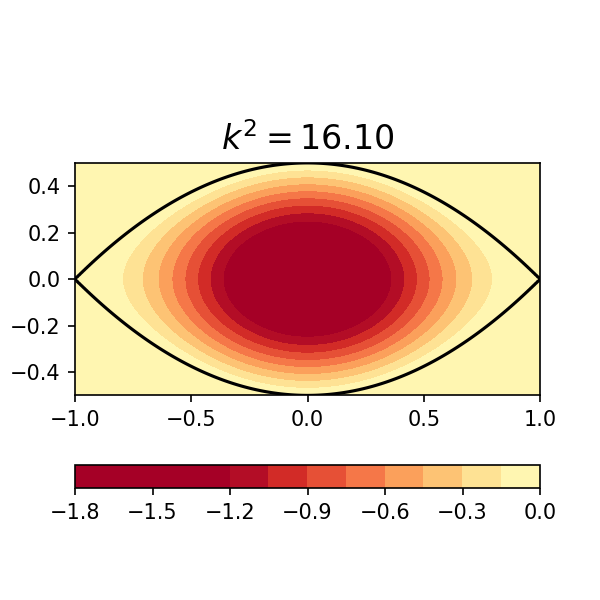

<IPython.core.display.Javascript object>


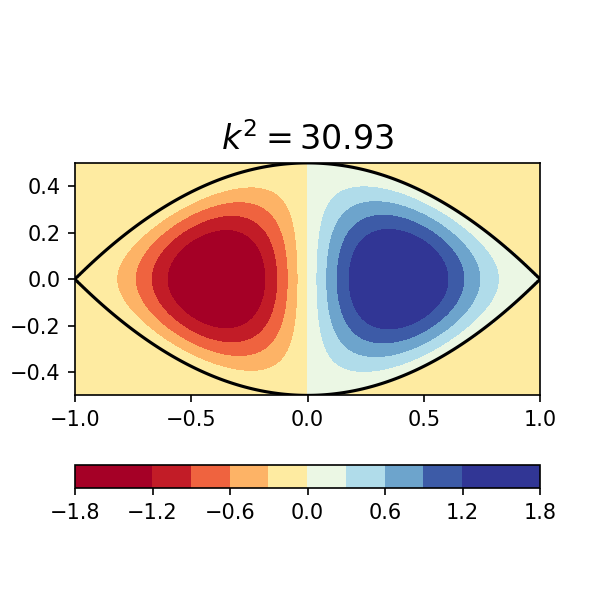

<IPython.core.display.Javascript object>


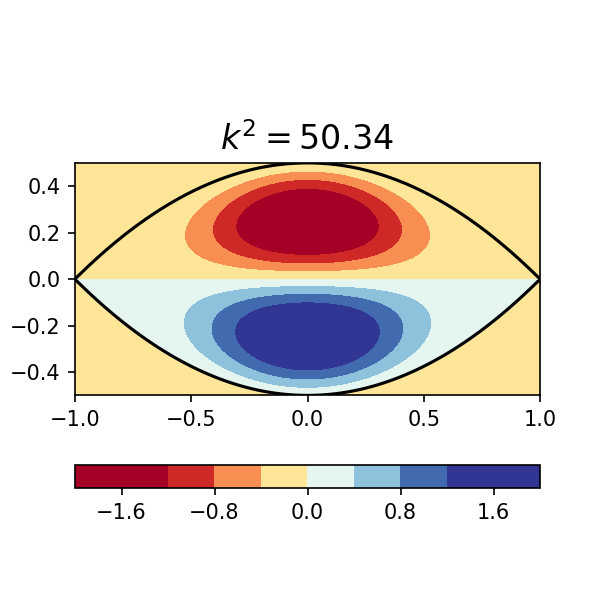

<IPython.core.display.Javascript object>


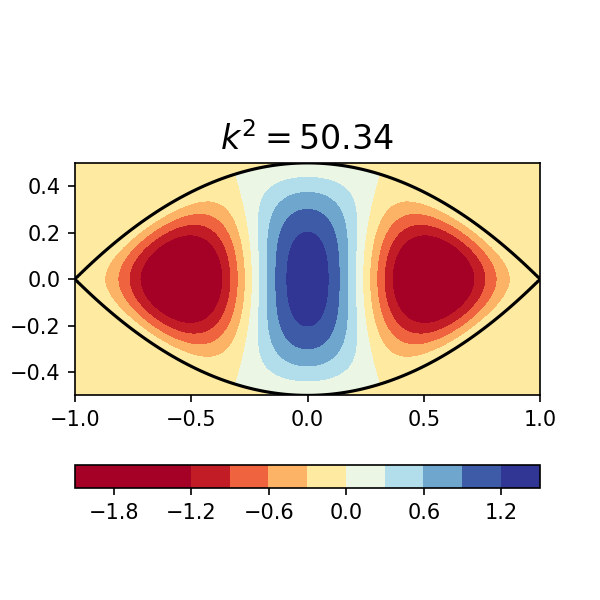

<IPython.core.display.Javascript object>


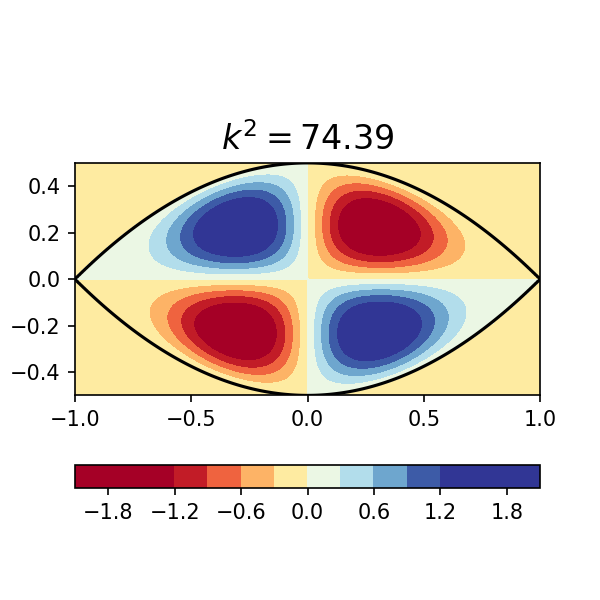

<IPython.core.display.Javascript object>


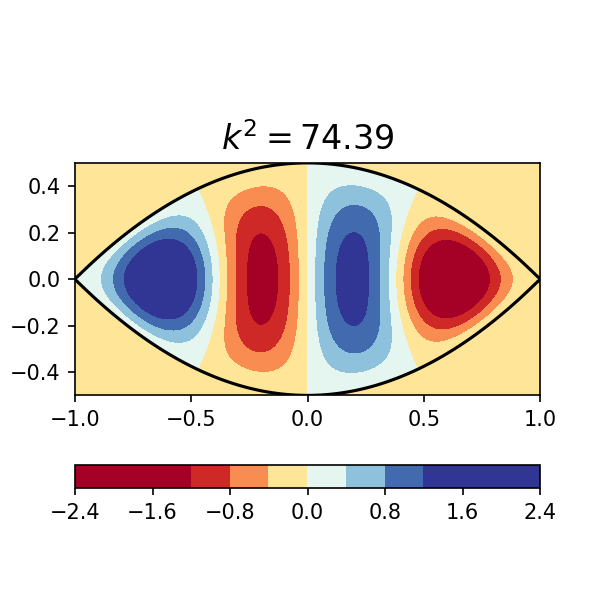

<IPython.core.display.Javascript object>


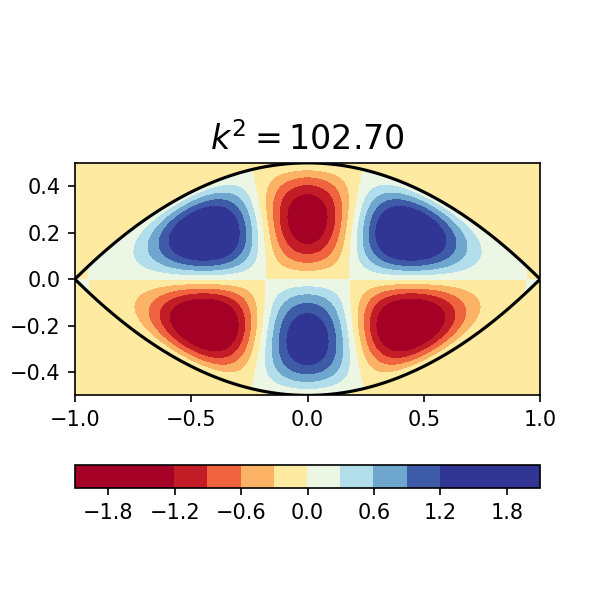

<IPython.core.display.Javascript object>


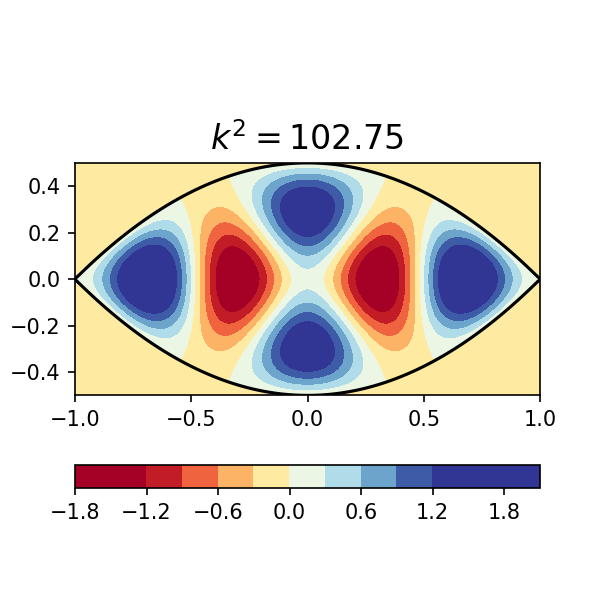

<IPython.core.display.Javascript object>


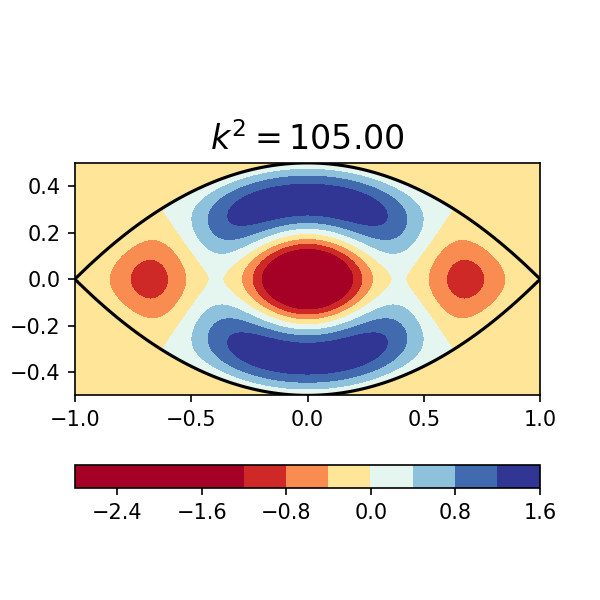

<IPython.core.display.Javascript object>


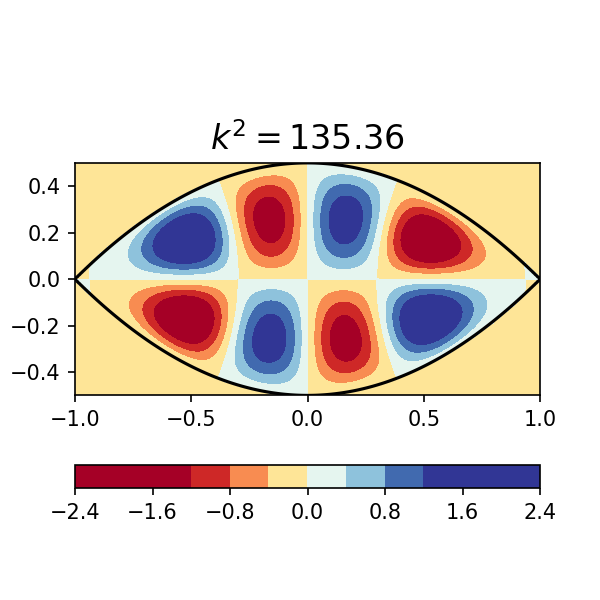

In [24]:
for i in range(len(vals)):
    U = sum(vecs[j, i]*u[j] for j in range(m*n))
    vecU = lambdify((x,y), U, "numpy")
    Z = vecU(X,Y)*mask
    Z_max = Z.max()
    Z_max = max (Z_max, -Z.min())
    plt.figure(figsize=(4, 4))
    plt.title(r"$k^2=%.2f$" % vals[i], size=16);
    plt.contour(X, Y, bound_num, [0], colors="black")
    plt.contourf(X, Y, Z, 12, cmap="RdYlBu", vmin=-1.2, vmax=1.2)
    plt.axis("image")
    plt.colorbar(orientation="horizontal");    